In [26]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import cv2 as cv
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing import image

In [27]:
model = load_model('../Saved_Models/VGG_16 transfer results/VGG_16 transfer.tf')

In [28]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
base_dir = "../../Data Store/Fish Data"
test_dir = os.path.join(base_dir, 'Test Dataset')
test_shrimp = os.path.join(test_dir, 'Trout')

In [30]:
img_path = os.path.join(test_shrimp, '00005.png')
img = image.load_img(img_path, target_size=(224, 224))

In [31]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)

print(img_tensor.shape)

(1, 224, 224, 3)


In [32]:
img_tensor = preprocess_input(img_tensor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


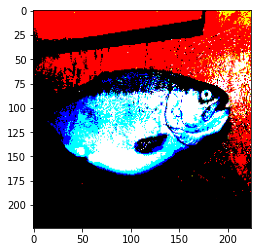

In [33]:
plt.imshow(img_tensor[0])
plt.show()

# Walking Through Layers

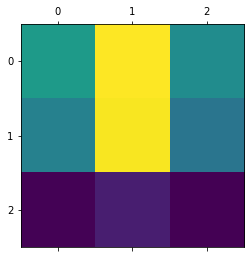

In [34]:
# View filters used across different layers of the model
filter = (((model.layers[1]).weights)[0])[:, :, 0, 10]

plt.matshow(filter, cmap = 'viridis')

In [35]:
layer_outputs = [layer.output for layer in model.layers[2:8]]

activation_model = Model(inputs = model.input, outputs = layer_outputs)

In [36]:
activations = activation_model.predict(img_tensor)

In [37]:
len(activations)

6

In [38]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [39]:
first_activation = activations[0]
first_activation.shape

(1, 224, 224, 64)

In [40]:
layer_names = []
for layer in model.layers[2:8]:
    layer_names.append(layer.name)

images_per_row = 16

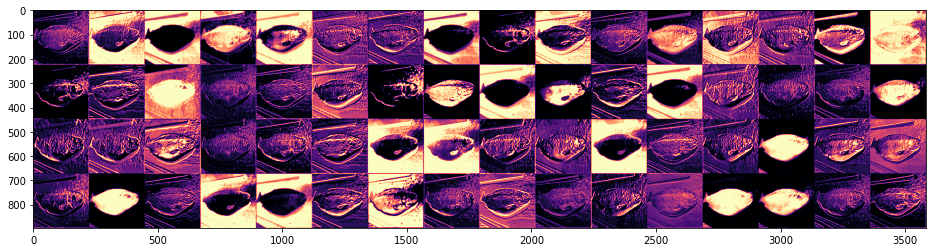

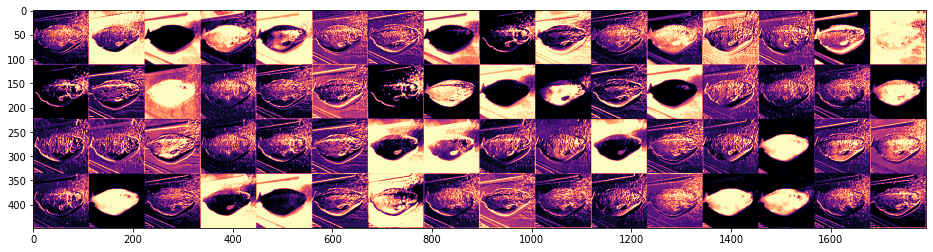

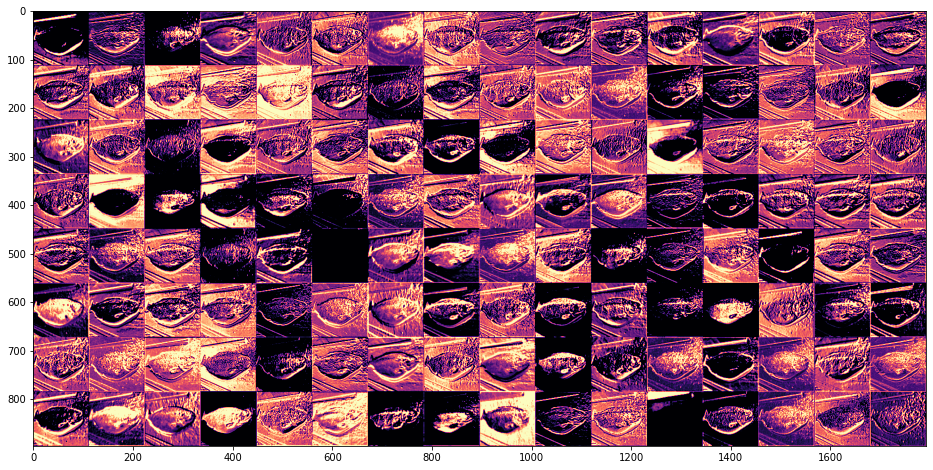

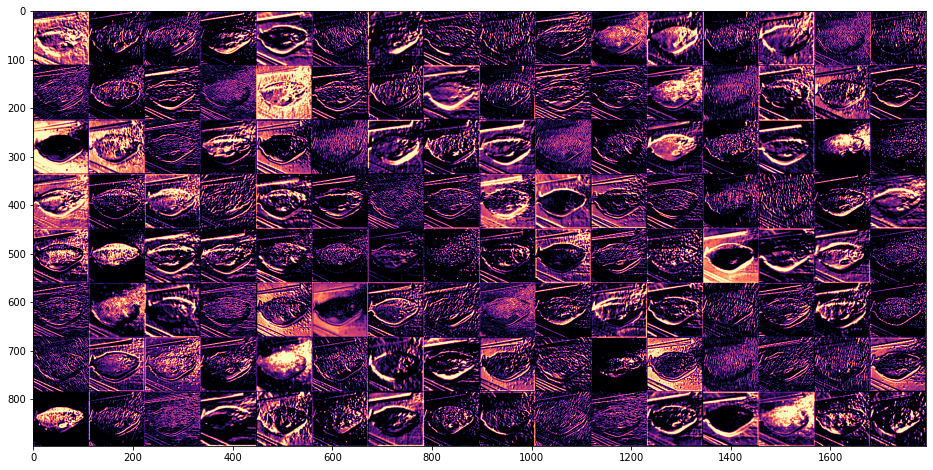

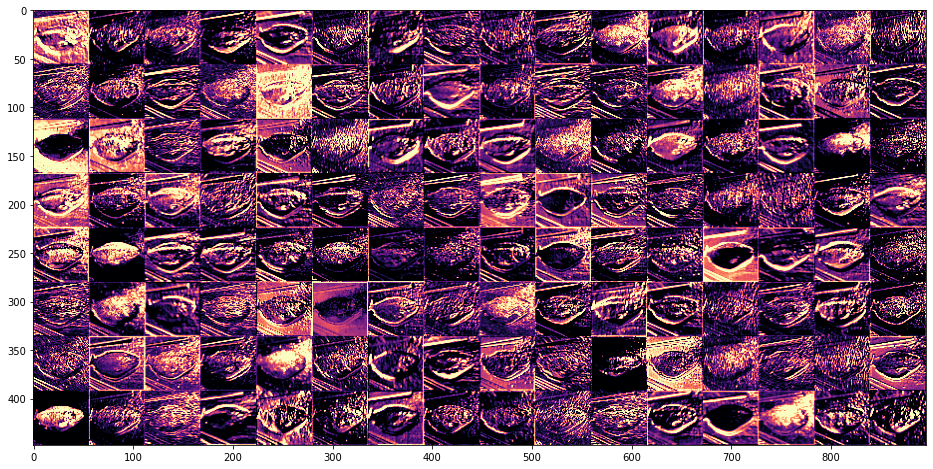

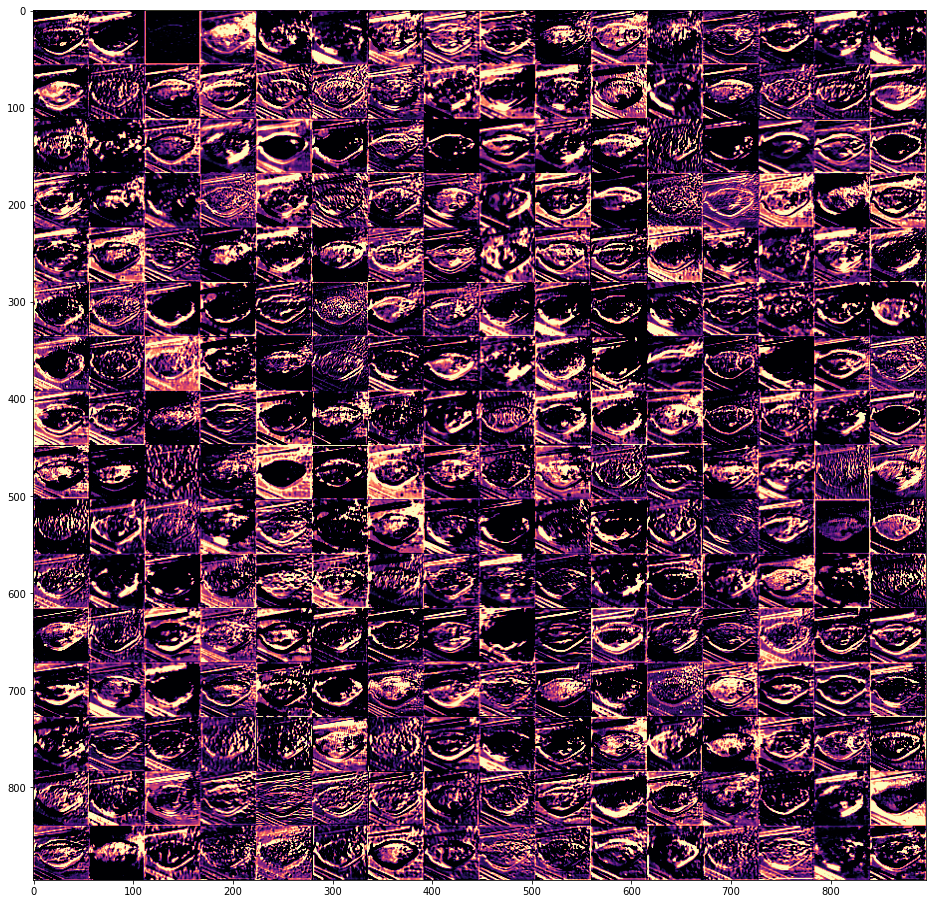

In [41]:
for layer_name, layer_activation in zip(layer_names, activations):

    # Features
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col*images_per_row + row]

            # Processing feature to make it visible
            channel_image -+ channel_image.mean()
            channel_image /= (channel_image.std() + 0.0001)
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[
                col * size : (col + 1) * size,
                row * size : (row + 1) * size
            ] = channel_image

    # Displaying the grid
    scale = 1. / size
    plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.grid(False)
    plt.imshow(display_grid, aspect = 'auto', cmap = 'magma')

In [42]:
(activations[0].shape)

(1, 224, 224, 64)

# Visualizing the Parts of Image that had most contribution towards making the classification as Trout

In [ ]:
# TODO